In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
titanic_df = pd.read_csv("titanic_train.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# 나이의 결측치를 평균값으로 대체하기
titanic_df["Age"] = titanic_df['Age'].fillna(titanic_df['Age'].mean())
titanic_df["Cabin"] = titanic_df['Cabin'].fillna("N")
titanic_df["Embarked"] = titanic_df['Embarked'].fillna("N")

In [5]:
from sklearn.preprocessing import LabelEncoder

def encode_features(dataDF):
    features = ['Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])

    return dataDF
titanic_df = encode_features(titanic_df)

In [6]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,N,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,N,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,N,3


In [7]:
# 불필요한 fearture 제거
drop_names = ["PassengerId", "Name", "Ticket", "Cabin"]
titanic_df = titanic_df.drop(drop_names, axis=1)
titanic_df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,3
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,3


In [8]:
Y = titanic_df["Survived"]
X = titanic_df.drop("Survived", axis=1)

In [9]:
# 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.2,
                                                    random_state=11)

In [10]:
# 학습하기
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [11]:
# 예측하기
dt_clf_pred = dt_clf.predict(X_test)

### Confusion Matrix : 혼동행렬

In [12]:
from sklearn.metrics import confusion_matrix

# 예측결과와 실제 결과의 혼동행렬을 출력해보기
confusion_matrix(y_test, dt_clf_pred)

array([[99, 19],
       [19, 42]])

In [13]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

print("정밀도 : ", precision_score(y_test, dt_clf_pred))
print("재현율 : ", recall_score(y_test, dt_clf_pred))

정밀도 :  0.6885245901639344
재현율 :  0.6885245901639344


In [14]:
# 함수로 만들어보기

def metrics_eval(y_test, pred):
    print("정확도 : ", accuracy_score(y_test, pred))
    print("정밀도 : ", precision_score(y_test, pred))
    print("재현율 : ", recall_score(y_test, pred))
    print("오차행렬 : ", confusion_matrix(y_test, pred))

In [15]:
metrics_eval(y_test, dt_clf_pred)

정확도 :  0.7877094972067039
정밀도 :  0.6885245901639344
재현율 :  0.6885245901639344
오차행렬 :  [[99 19]
 [19 42]]


### 정밀도 재현율 트레이드오프

In [16]:
pred_proba = dt_clf.predict_proba(X_test)
pred = dt_clf.predict(X_test)

In [17]:
pred_proba.shape

(179, 2)

In [18]:
pred.reshape(-1, 1).shape

(179, 1)

In [19]:
# 한눈에 확인해보기
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1, 1)], axis=1)
pred_proba_result[:10]

array([[0., 1., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 1.],
       [1., 0., 0.],
       [0., 1., 1.]])

### precision_recall_curve() 확인해보기

In [20]:
from sklearn.metrics import precision_recall_curve

# 레이블이 1일때의 예측 확률을 추출
pred_proba_class1 = dt_clf.predict_proba(X_test)[:, 1]

In [21]:
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)

In [22]:
precisions.shape, recalls.shape, thresholds.shape

((7,), (7,), (6,))

In [23]:
precisions

array([0.34078212, 0.65625   , 0.66666667, 0.67741935, 0.68852459,
       0.6779661 , 1.        ])

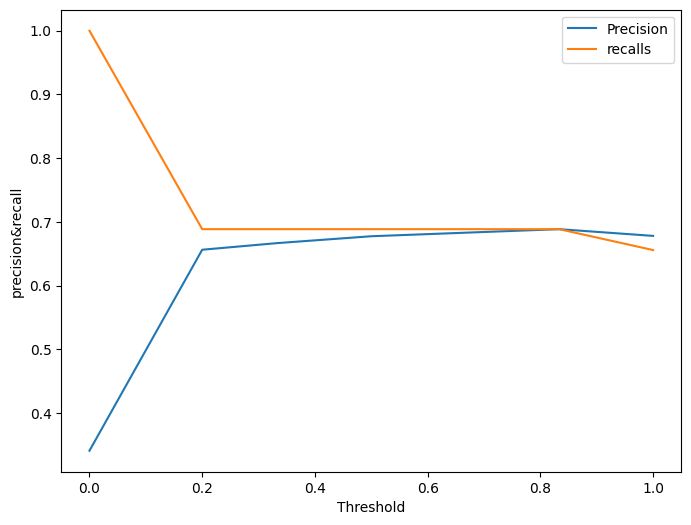

In [24]:
# 차트로 그려보기
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="recalls")
plt.xlabel("Threshold")
plt.ylabel("precision&recall")
plt.legend()
plt.show()

 ### Roc 곡선과 AUC 점수를 그래프로 나타내기
 - FPR : False Positive Rate : 실제 네거티브인 샘플 중에서 Positive 로 잘못 예측한 비율
 - TPR : True Positive Rate : 실제 Positive 인 샘플중에서 제대로 예측한 비율 : 재현율
 - AUC : ROC 곡선의 아래면적을 뜻함. 

In [25]:
from sklearn.metrics import roc_curve, roc_auc_score

# ROC curve 를 위한 FPR, TPR 계산
fprs, tprs, roc_thresholds = roc_curve(y_test, pred_proba_class1)

In [26]:
# AUC 점수를 계산
roc_auc = roc_auc_score(y_test, pred_proba_class1)
print("roc_auc 점수는 :", roc_auc)

roc_auc 점수는 : 0.757154765212559


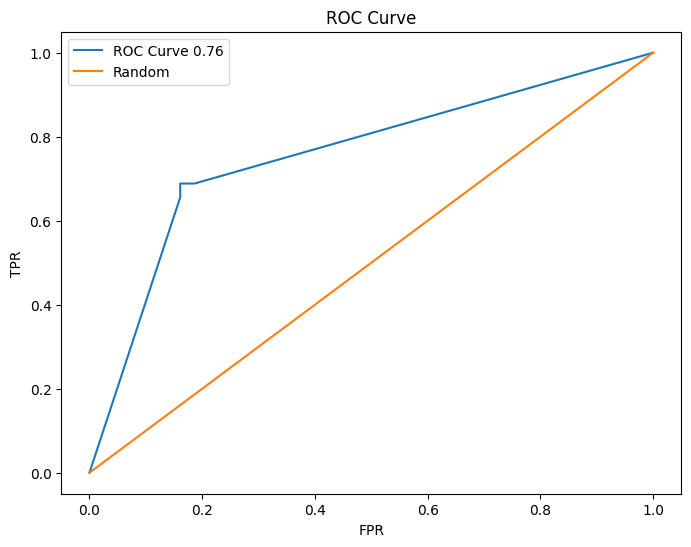

In [27]:
## 차트 그려보기
plt.figure(figsize=(8, 6))
plt.plot(fprs, tprs, label=f"ROC Curve {roc_auc:.2f}")
plt.plot([0,1], [0, 1], label="Random")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend()
plt.show()